In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Cargar los archivos CSV
train_csv_path = "archive_1/emnist-byclass-train.csv"
test_csv_path = "archive_1/emnist-byclass-test.csv"

In [ ]:
#LEER CON PANDAS SOLO UN FRAGMENTO
train_df = pd.read_csv(train_csv_path, nrows=10000)
test_df = pd.read_csv(test_csv_path, nrows=2000)

In [ ]:
#PROCESAMIENTO
train_labels = train_df.iloc[:, 0].values.astype(np.int64)
train_images = train_df.iloc[:, 1:].values.astype(np.float32) / 255.0

test_labels = test_df.iloc[:, 0].values.astype(np.int64)
test_images = test_df.iloc[:, 1:].values.astype(np.float32) / 255.0

train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

In [ ]:
# Rotar EMNIST 
train_images = np.transpose(train_images, (0, 2, 1))
test_images = np.transpose(test_images, (0, 2, 1))

# Expandir canal para que sea (28, 28, 1)
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [ ]:
# CREAR DATASETS
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(1000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

In [ ]:
# DEFINIR MODELO CNN PERSONALIZADO
num_classes = len(np.unique(train_labels))

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,742 (905.24 KB)

 Trainable params: 231,742 (905.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ENTRENAMIENTO
model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3479 - loss: 2.7223 - val_accuracy: 0.6920 - val_loss: 1.0942
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6673 - loss: 1.1702 - val_accuracy: 0.7620 - val_loss: 0.7732
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7366 - loss: 0.8730 - val_accuracy: 0.7720 - val_loss: 0.6852
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7677 - loss: 0.7298 - val_accuracy: 0.7905 - val_loss: 0.6572
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7781 - loss: 0.6420 - val_accuracy: 0.7960 - val_loss: 0.6233


In [ ]:
# EVALUACIÓN FINAL
test_loss, test_acc = model.evaluate(test_ds)
print(f"\nPrecisión en test: {test_acc:.4f}")

 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8438 - loss: 0.3887

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8007 - loss: 0.6307

Precisión en test: 0.7960


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


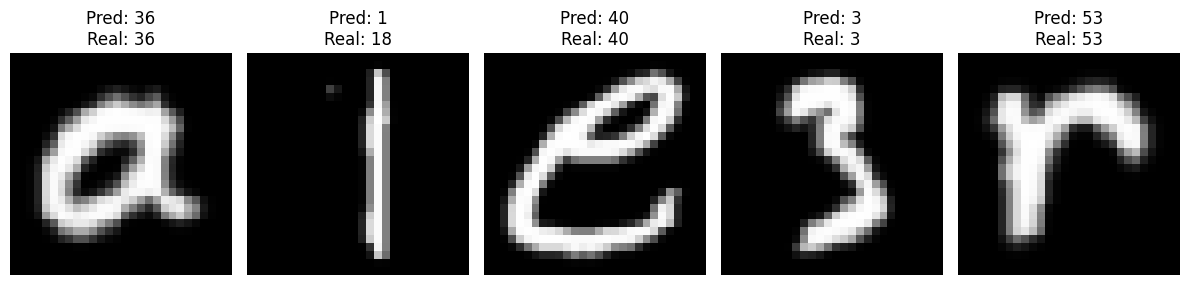

In [51]:
# MOSTRAR PREDICCIONES
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    predictions_np = np.argmax(predictions, axis=1)
    images_np = images.numpy().squeeze()
    labels_np = labels.numpy()

import random

# Elegir 5 índices aleatorios del batch actual
random_indices = random.sample(range(len(images_np)), 5)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images_np[idx], cmap='gray')
    plt.title(f"Pred: {predictions_np[idx]}\nReal: {labels_np[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()